In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exploring high dimensional data


In [2]:
pokemon_df = pd.read_csv('pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Removing features without variance

In [3]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type 1']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
df_selected.head()

,HP,Attack,Defense,Name,Type 1
0,45,49,49,Bulbasaur,Grass
1,60,62,63,Ivysaur,Grass
2,80,82,83,Venusaur,Grass
3,80,100,123,VenusaurMega Venusaur,Grass
4,39,52,43,Charmander,Fire


### Visually detecting redundant features

In [4]:
female = pd.read_csv('ANSUR_II_FEMALE.csv')
male = pd.read_csv('ANSUR_II_MALE.csv') 
ansur_df = pd.concat([female, male])
ansur_df['body_height'] = ansur_df['stature_m']
ansur_df['n_legs'] = 2
ansur_df_1 = ansur_df[['Gender', 'weight_kg', 'stature_m', 'body_height']]
ansur_df_2 = ansur_df[['Gender', 'footlength', 'headlength', 'n_legs']]

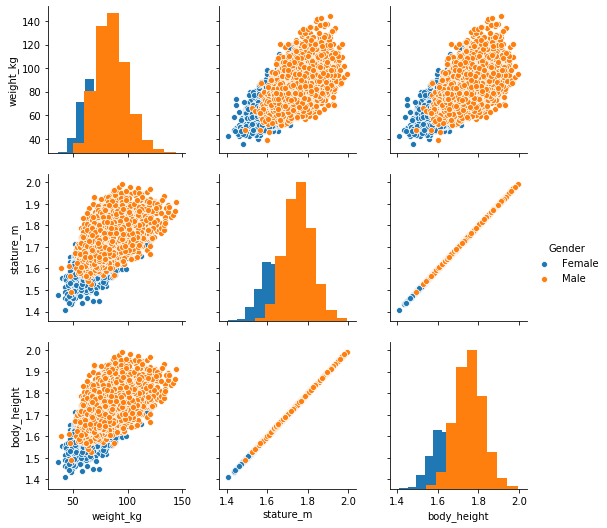

In [5]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

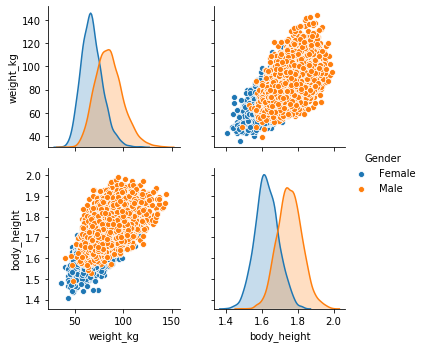

In [6]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

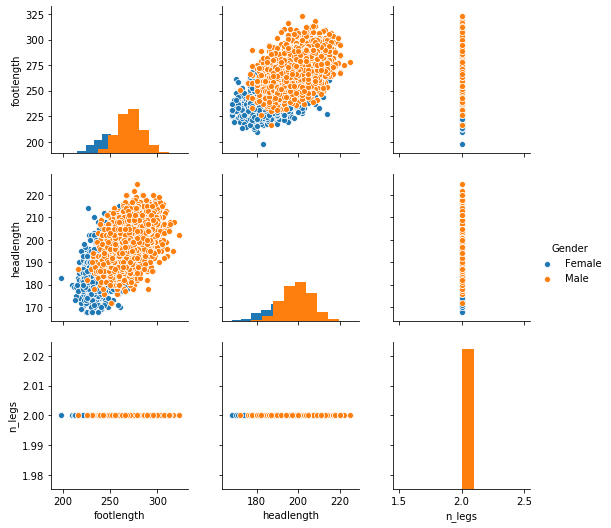

In [7]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

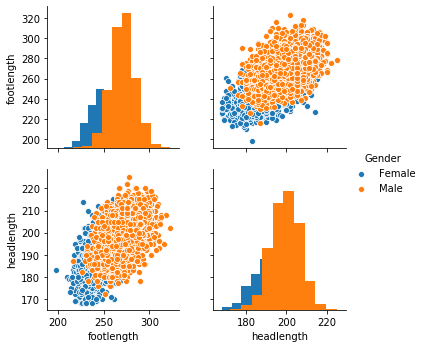

In [8]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

### Fitting t-SNE to the ANSUR data

In [9]:
from sklearn.manifold import TSNE

In [10]:
ansur_df = ansur_df[['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference',
       'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength',
       'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting',
       'iliocristaleheight', 'interpupillarybreadth', 'interscyei', 'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight',
       'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference', 'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength',
       'shouldercircumference', 'shoulderelbowlength', 'shoulderlength', 'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight',
       'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight', 'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth',
       'waistcircumference', 'waistdepth', 'waistfrontlengthsitting', 'waistheightomphalion', 'wristcircumference', 'wristheight']]

In [11]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = ansur_df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate = 50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features)

[[  9.827035  -49.156567 ]
 [-12.690715  -32.825844 ]
 [ -2.0465956 -26.788158 ]
 ...
 [ -1.0742129  -7.5088315]
 [-27.155554    0.5900738]
 [  5.259024   43.0987   ]]


### t-SNE visualisation of dimensionality

In [12]:
tsne = pd.DataFrame(tsne_features, columns = ['x', 'y'])
df = ansur_df.join(tsne)

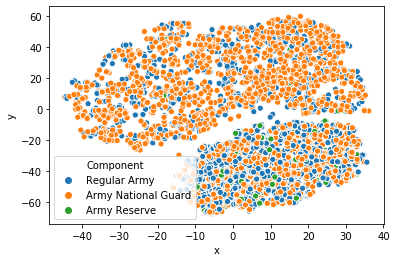

In [13]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

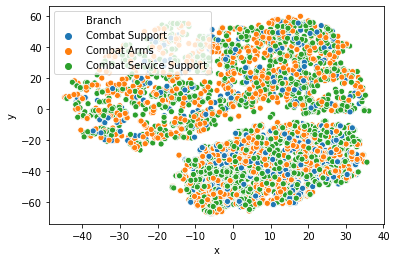

In [14]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

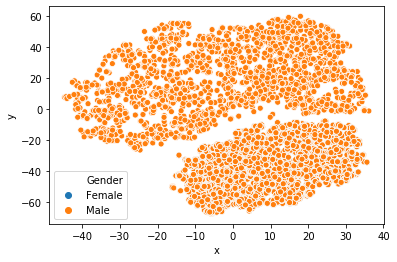

In [15]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

## Feature selection I, selecting for feature information

### Train - test split

In [16]:
ansur_df = ansur_df[['Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight']]

In [17]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis = 1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 91 Features.


### Fitting and testing the model

In [18]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC(gamma = 'auto')

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

68.9% accuracy on test set vs. 100.0% on training set


### Accuracy after dimensionality reduction

In [19]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

92.9% accuracy on test set vs. 93.5% on training set


### Finding a good variance threshold

In [20]:
head_df = ansur_df[['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']]
head_df['n_hairs'] = 10000 

/Users/huiren/anaconda3/envs/2019/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


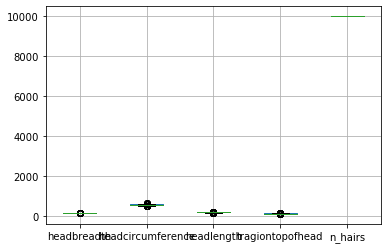

In [21]:
# Create the boxplot
head_df.boxplot()

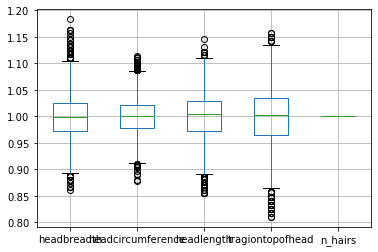

In [22]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()

In [23]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          0.001679
headcircumference    0.001030
headlength           0.001868
tragiontopofhead     0.002640
n_hairs              0.000000
dtype: float64


### Features with low variance

In [24]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 5 to 4.


### Removing features with many missing values

In [25]:
school_df = pd.read_csv('Public_Schools2.csv')

In [26]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


### Visualizing the correlation matrix

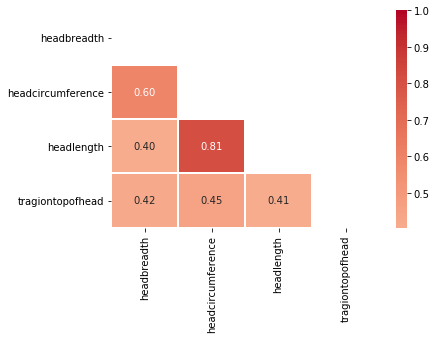

In [27]:
df = ansur_df[['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']]
# Create the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, cmap = 'coolwarm', mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

### Filtering out highly correlated features

In [28]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 74 columns


In [29]:
weird_df = pd.DataFrame([[421.0, 728.3], [465.0, 753.9], [494.0, 768.8], [538.0, 780.1], [430.0, 763.7], [530.0, 788.5], [511.0, 782.0], [600.0, 787.2], [582.0, 806.4], [605.0, 806.2], [603.0, 798.9]], columns = ['pool_drownings', 'nuclear_energy'])

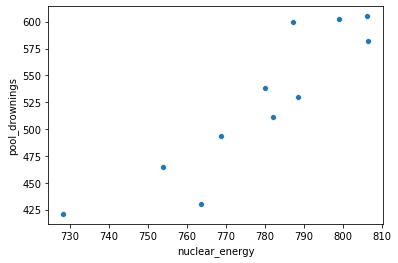

In [30]:
# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)

## Feature selection II, selecting for model accuracy

### Building a diabetes classifier

In [31]:
diabetes_df = pd.read_csv('PimaIndians.csv')
diabetes_df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [32]:
y = diabetes_df['test']
X = diabetes_df.drop('test', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Fit the scaler on the training features and transform these in one go

scaler = StandardScaler()
lr = LogisticRegression(solver = 'liblinear')

X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'pregnant': 0.36, 'glucose': 1.16, 'diastolic': 0.06, 'triceps': 0.12, 'insulin': 0.16, 'bmi': 0.38, 'family': 0.34, 'age': 0.29}


### Manual Recursive Feature Elimination

In [34]:
# Remove the feature with the lowest model coefficient
X = diabetes_df[['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'pregnant': 0.04, 'glucose': 1.23, 'diastolic': 0.03, 'triceps': 0.24, 'insulin': 0.19, 'bmi': 0.38, 'family': 0.34, 'age': 0.34}


### Automatic Recursive Feature Elimination

In [35]:
from sklearn.feature_selection import RFE
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(solver = 'liblinear'), n_features_to_select=3, verbose=1)

# Fit the eliminator to the data
rfe.fit(scaler.fit_transform(X_train), y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 5, 'glucose': 1, 'diastolic': 6, 'triceps': 3, 'insulin': 4, 'bmi': 1, 'family': 2, 'age': 1}
Index(['glucose', 'bmi', 'age'], dtype='object')
80.6% accuracy on test set.


### Building a random forest model

In [36]:
from sklearn.ensemble import RandomForestClassifier
# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0, n_estimators = 10)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc))

{'pregnant': 0.09, 'glucose': 0.21, 'diastolic': 0.08, 'triceps': 0.11, 'insulin': 0.13, 'bmi': 0.09, 'family': 0.12, 'age': 0.16}
77.6% accuracy on test set.


### Random forest for feature selection

In [37]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose', 'age'], dtype='object')


### Recursive Feature Elimination with random forests

In [38]:
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(n_estimators = 10), n_features_to_select=2, step = 2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'age'], dtype='object')


### Creating a LASSO regressor

In [39]:
female = pd.read_csv('ANSUR_II_FEMALE.csv')
male = pd.read_csv('ANSUR_II_MALE.csv') 
ansur_df = pd.concat([female, male])

In [40]:
X = ansur_df[['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight']]
y = ansur_df['BMI']

In [41]:
from sklearn.linear_model import Lasso
# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Lasso model results

In [42]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 83.9% of the variance in the test set.
The model has ignored 81 out of 91 features.


### Adjusting the regularization strength

In [43]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict 98.0% of the variance in the test set.
68 out of 91 features were ignored.


### Creating a LassoCV regressor

In [44]:
X = ansur_df[ansur_df.Gender == 'Male'][['acromialheight', 'axillaheight', 'bideltoidbreadth', 'buttockcircumference', 'buttockkneelength', 'buttockpopliteallength', 'cervicaleheight', 'chestcircumference', 'chestheight',
       'earprotrusion', 'footbreadthhorizontal', 'forearmcircumferenceflexed', 'handlength', 'headbreadth', 'heelbreadth', 'hipbreadth', 'iliocristaleheight', 'interscyeii',
       'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'neckcircumferencebase', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'sleeveoutseam',
       'thighcircumference', 'thighclearance', 'verticaltrunkcircumferenceusa', 'waistcircumference', 'waistdepth', 'wristheight', 'BMI']]
y = ansur_df[ansur_df.Gender == 'Male']['bicepscircumferenceflexed']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV(cv =3)
lcv.fit(scaler.fit_transform(X_train), y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(scaler.transform(X_test), y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 0.038
The model explains 85.6% of the test set variance
24 features out of 32 selected


### Ensemble models for extra votes

In [47]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.get_support()

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
The model can explain 83.3% of the variance in the test set


In [48]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(n_estimators = 10), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
The model can explain 81.4% of the variance in the test set


### Combining 3 feature selectors

In [49]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

The model can explain 82.9% of the variance in the test set using 6 features.


## Feature extraction

### Manual feature extraction I

In [50]:
sales_df = pd.read_csv('grocery_sales.csv')
sales_df.head()

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


In [51]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


### Manual feature extraction II

In [52]:
# # Calculate the mean height
# height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# # Drop the 3 original height features
# reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

# print(reduced_df.head())

### Calculating Principal Components

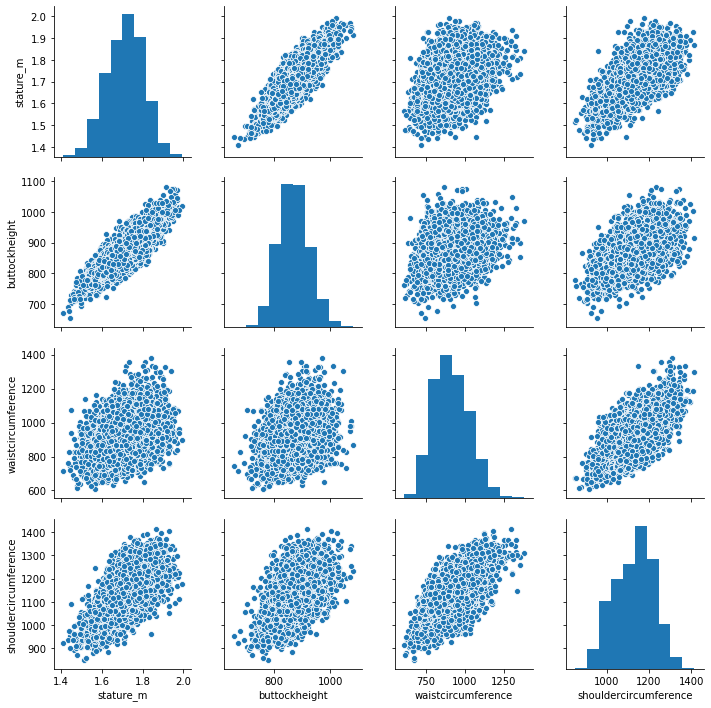

In [53]:
ansur_df_1 = ansur_df[['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference']]

# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df_1 )

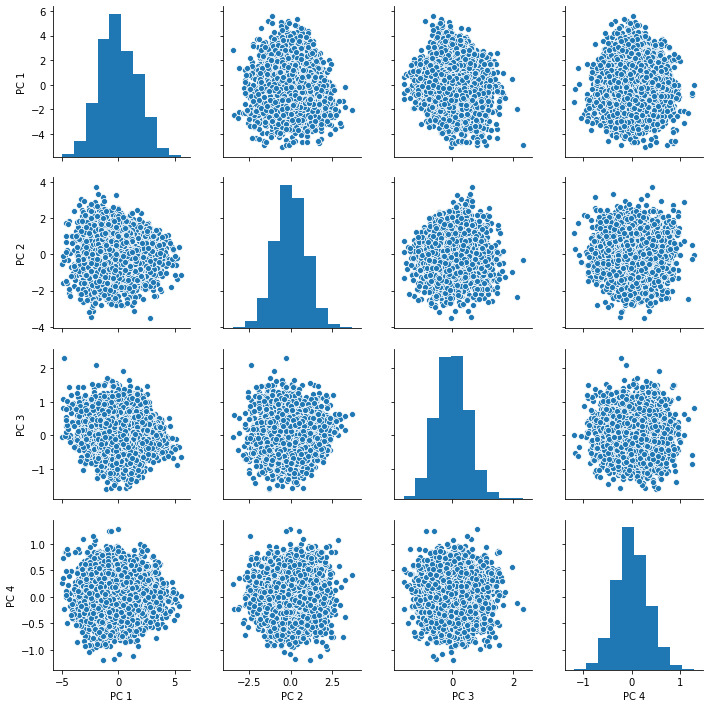

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df_1 )

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)

### PCA on a larger dataset

In [55]:
ansur_df_2 = ansur_df[['stature_m', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference', 'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference',
       'cervicaleheight', 'sittingheight']]

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df_2)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### PCA explained variance

In [57]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[6.96695776e-01 1.65318195e-01 4.41759304e-02 3.10140882e-02
 1.96244729e-02 1.05810800e-02 1.00183486e-02 7.58854596e-03
 5.29894105e-03 4.64328943e-03 2.69987761e-03 1.87568473e-03
 4.65770148e-04]
[0.69669578 0.86201397 0.9061899  0.93720399 0.95682846 0.96740954
 0.97742789 0.98501644 0.99031538 0.99495867 0.99765855 0.99953423
 1.        ]


### Understanding the components

In [58]:
poke_df = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

In [59]:
from sklearn.pipeline import Pipeline
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


### PCA for feature exploration

In [60]:
poke_cat_df = pokemon_df[['Type 1', 'Legendary']]

/Users/huiren/anaconda3/envs/2019/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/huiren/anaconda3/envs/2019/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


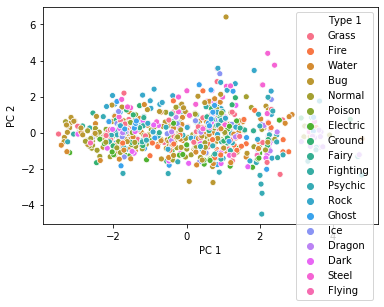

In [61]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()

/Users/huiren/anaconda3/envs/2019/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/huiren/anaconda3/envs/2019/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


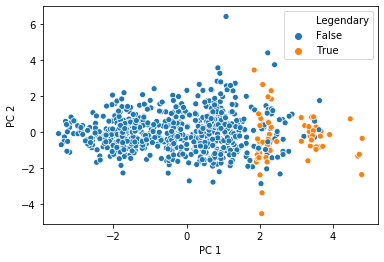

In [62]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

### PCA in a model pipeline

In [63]:
X = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = pokemon_df['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [64]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(n_estimators = 10, random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.45673596 0.18599109 0.12852181]
93.3% test set accuracy


### Selecting the proportion of variance to keep

In [65]:
ansur_df_3 = ansur_df[['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight', 'weight_kg', 'stature_m', 'BMI']]

In [ ]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df_3)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

### Choosing the number of components

In [ ]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_varience_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

### PCA for image compression

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 4, figsize=(6, 6),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.05, wspace=0.05))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary',
                  clim=(0, 300))
    plt.show()

In [ ]:
# Plot the MNIST sample data
plot_digits(X_test)

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print("X_test has {} features".format(X_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print("X_rebuilt has {} features".format(X_rebuilt.shape[1]))

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)